In [1]:
import pandas as pd
import matplotlib.pyplot as plt

ca = pd.read_csv('data/CA.csv')
il = pd.read_csv('data/IL.csv')
tx = pd.read_csv('data/TX.csv')
va = pd.read_csv('data/VA.csv')
wa = pd.read_csv('data/WA.csv')

In [3]:
def get_cases_df(df):
    df['date'] = pd.to_datetime(df['date'])
    df.sort_values(by='date', inplace=True)
    df = df[['date', 'cumulative_cases']]
    df = df.groupby('date')['cumulative_cases'].sum()
    df = pd.DataFrame(df)
    return df

In [36]:
def get_cases_df2(df):
    df['date'] = pd.to_datetime(df['date'])
    df.sort_values(by='date', inplace=True)
    df = df[['date', 'New cases']]
    df = df.groupby('date')['New cases'].sum()
    df = pd.DataFrame(df)
    return df

In [4]:
df_ca = get_cases_df(ca)
df_il = get_cases_df(il)
df_tx = get_cases_df(tx)
df_va = get_cases_df(va)
df_wa = get_cases_df(wa)

In [8]:
df_ca.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 173 entries, 2020-01-22 to 2023-05-10
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   cumulative_cases  173 non-null    int64
dtypes: int64(1)
memory usage: 2.7 KB


In [9]:
population = {'CA': 39240000,
              'IL': 12670000,
              'TX': 29530000,
              'VA': 8642000,
              'WA': 6216589}

In [10]:
df_ca['div_cumulative_cases'] = df_ca['cumulative_cases'] / population['CA']
df_il['div_cumulative_cases'] = df_il['cumulative_cases'] / population['IL']
df_tx['div_cumulative_cases'] = df_tx['cumulative_cases'] / population['TX']
df_va['div_cumulative_cases'] = df_va['cumulative_cases'] / population['VA']
df_wa['div_cumulative_cases'] = df_wa['cumulative_cases'] / population['WA']

In [30]:
def show_plot_5(df1, df2, df3, df4, df5, label):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(df1, label='CA')
    ax.plot(df2, label='IL')
    ax.plot(df3, label='TX')
    ax.plot(df4, label='VA')
    ax.plot(df5, label='WA')
    ax.set_title(f'{label} cases per capita')
    ax.legend()
    plt.show()

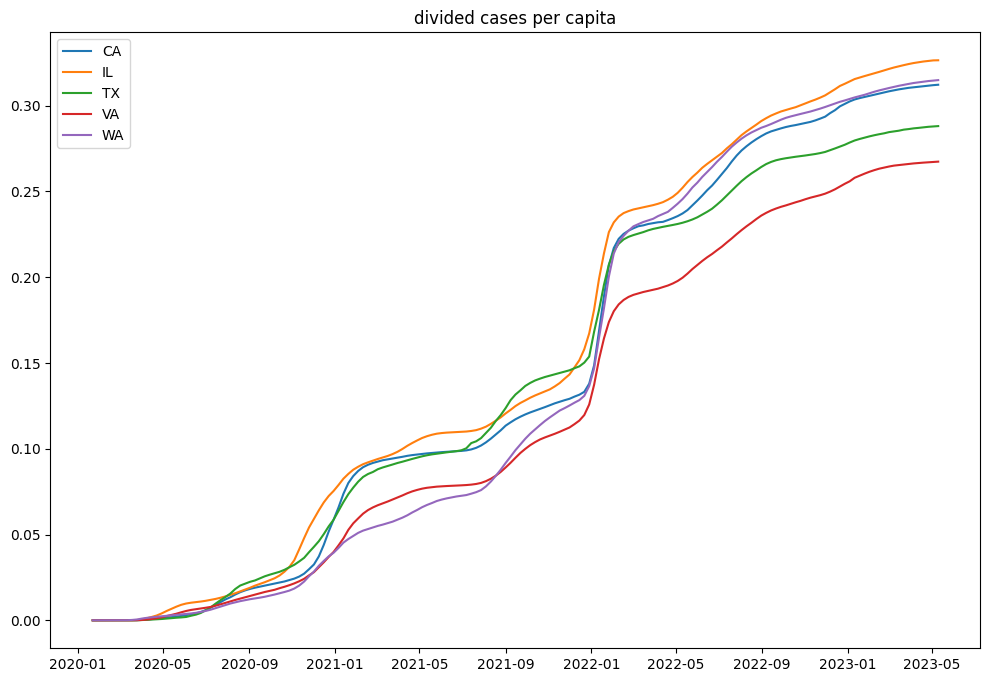

In [32]:
show_plot_5(df_ca['div_cumulative_cases'],
            df_il['div_cumulative_cases'],
            df_tx['div_cumulative_cases'],
            df_va['div_cumulative_cases'],
            df_wa['div_cumulative_cases'], 'divided')

In [33]:
df_ca['diff_cumulative_cases'] = df_ca['div_cumulative_cases'].diff()
df_il['diff_cumulative_cases'] = df_il['div_cumulative_cases'].diff()
df_tx['diff_cumulative_cases'] = df_tx['div_cumulative_cases'].diff()
df_va['diff_cumulative_cases'] = df_va['div_cumulative_cases'].diff()
df_wa['diff_cumulative_cases'] = df_wa['div_cumulative_cases'].diff()

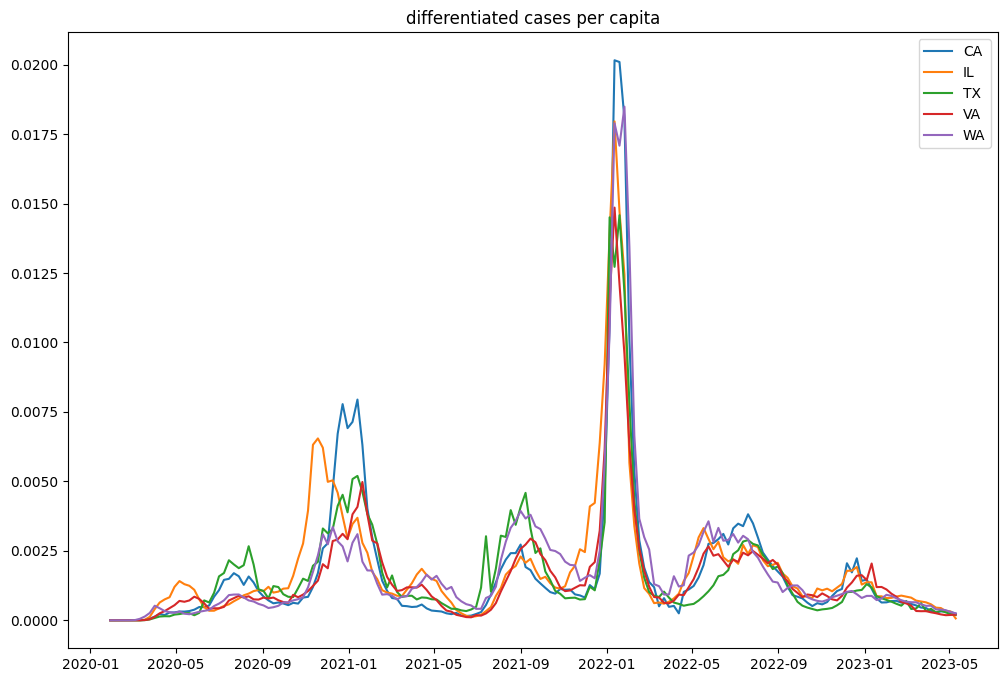

In [34]:
show_plot_5(df_ca['diff_cumulative_cases'],
            df_il['diff_cumulative_cases'],
            df_tx['diff_cumulative_cases'],
            df_va['diff_cumulative_cases'],
            df_wa['diff_cumulative_cases'], 'differentiated')

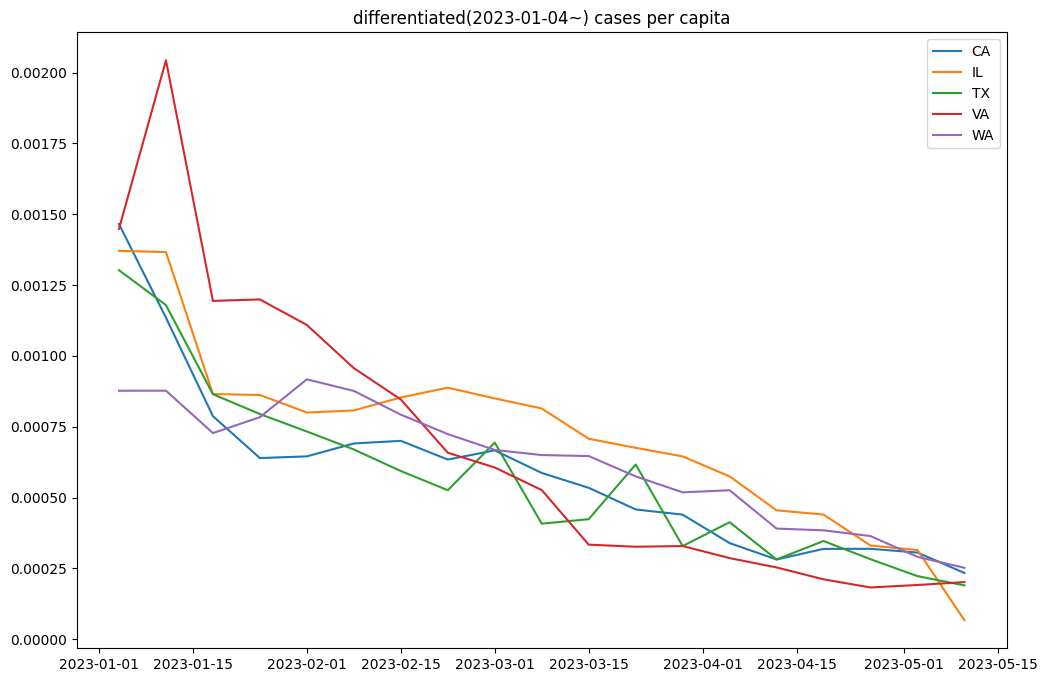

In [45]:
show_plot_5(df_ca.loc['2023-01-04':]['diff_cumulative_cases'],
            df_il.loc['2023-01-04':]['diff_cumulative_cases'],
            df_tx.loc['2023-01-04':]['diff_cumulative_cases'],
            df_va.loc['2023-01-04':]['diff_cumulative_cases'],
            df_wa.loc['2023-01-04':]['diff_cumulative_cases'], 'differentiated(2023-01-04~)')

In [47]:
print(f"CA : {df_ca.loc['2023-01-04']['diff_cumulative_cases'] - df_ca.loc['2023-05-10']['diff_cumulative_cases']}")
print(f"IL : {df_il.loc['2023-01-04']['diff_cumulative_cases'] - df_il.loc['2023-05-10']['diff_cumulative_cases']}")
print(f"TX : {df_tx.loc['2023-01-04']['diff_cumulative_cases'] - df_tx.loc['2023-05-10']['diff_cumulative_cases']}")
print(f"VA : {df_va.loc['2023-01-04']['diff_cumulative_cases'] - df_va.loc['2023-05-10']['diff_cumulative_cases']}")
print(f"WA : {df_wa.loc['2023-01-04']['diff_cumulative_cases'] - df_wa.loc['2023-05-10']['diff_cumulative_cases']}")

CA : 0.0012312691131498577
IL : 0.00130363062352018
TX : 0.0011121909922112705
VA : 0.0012464707243693418
WA : 0.0006247799235239992


In [57]:
len(df_ca.loc['2023-01-04':]['diff_cumulative_cases'])

19

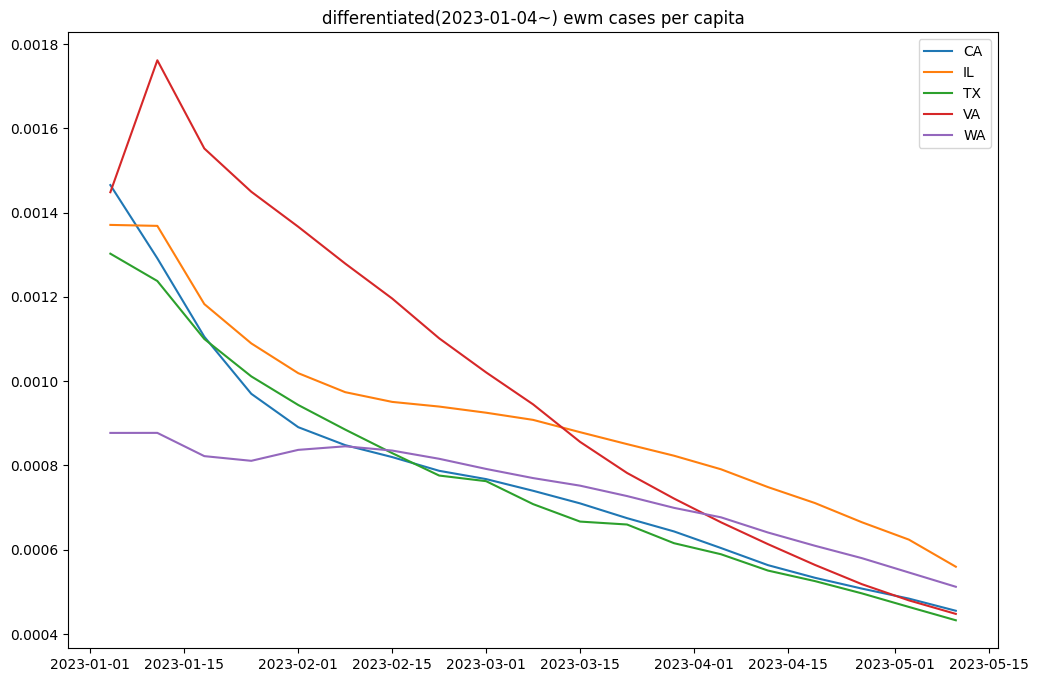

In [55]:
show_plot_5(df_ca.loc['2023-01-04':]['diff_cumulative_cases'].ewm(span=19).mean(),
            df_il.loc['2023-01-04':]['diff_cumulative_cases'].ewm(span=19).mean(),
            df_tx.loc['2023-01-04':]['diff_cumulative_cases'].ewm(span=19).mean(),
            df_va.loc['2023-01-04':]['diff_cumulative_cases'].ewm(span=19).mean(),
            df_wa.loc['2023-01-04':]['diff_cumulative_cases'].ewm(span=19).mean(), 'differentiated(2023-01-04~) ewm')